In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import random

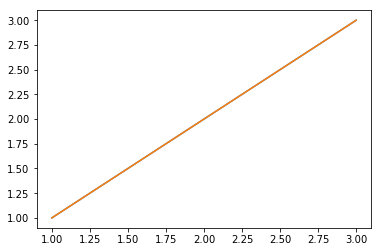

In [4]:
x = [1,2,3]
y = [1,2,3]
plt.plot(x, y)
plt.show()

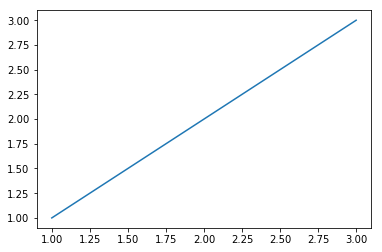

In [9]:
fig = plt.figure()
ax = plt.axes()
plt.plot(x, y)
plt.show()

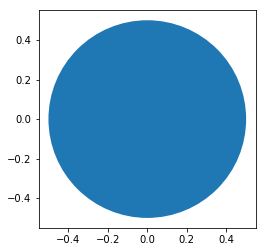

In [14]:
# 円
circle = plt.Circle((0, 0), radius= 0.5)
ax = plt.gca()
ax.add_patch(circle)
plt.axis('scaled') # 座標軸の両端を自動調整
plt.show()

In [47]:
# 投射軌跡のアニメーション
g = 9.8 # 重力加速度
# u: 初速, theta: 投射角度
def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta) / g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

# 座標更新
def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t**2
    circle.center = x, y
    return circle

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    tmax = u * math.sin(theta) / g
    ymax = u * math.sin(theta) * tmax - 0.5 * g * tmax**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, xmax), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position, fargs=(circle, intervals, u, theta), frames=len(intervals), interval=1, repeat=False)
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    return anim

<IPython.core.display.Javascript object>


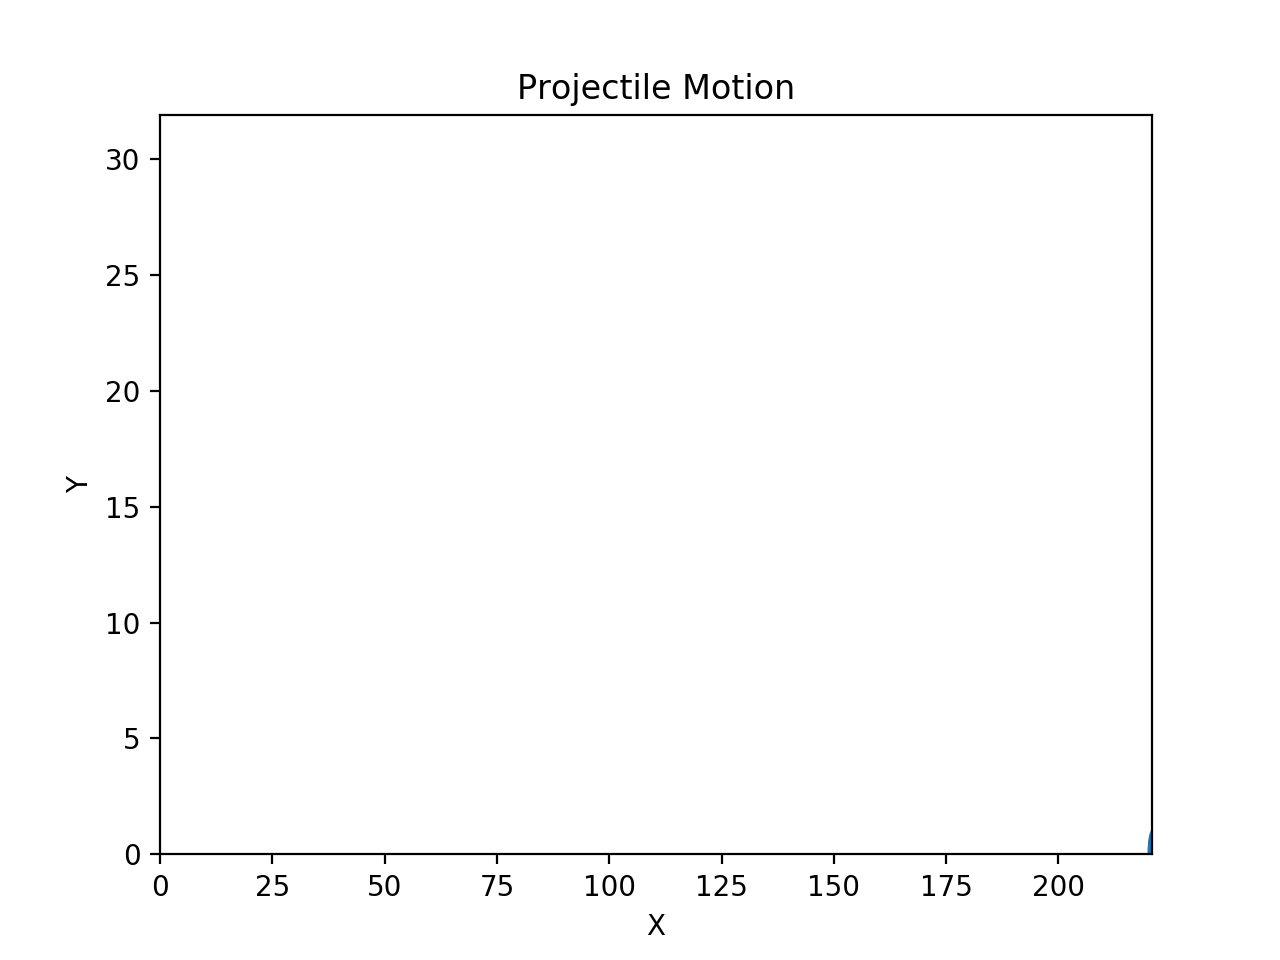

In [48]:
create_animation(50,  math.radians(30))

In [80]:
# ランダムウォーク
class RandomWalk:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.xlist = [self.x]
        self.ylist = [self.y]
        
    def nextStep(self):
        def up():
            return self.y + 1
        def down():
            return self.y - 1
        self.x = self.x + 1
        stepFunc = random.choice([up, down])
        self.y = stepFunc()
        self.xlist.append(self.x)
        self.ylist.append(self.y)
        
    def walk(self, num):
        for i in range(1, num):
            self.nextStep()
    
    def plot(self):
        plt.plot(self.xlist, self.ylist)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

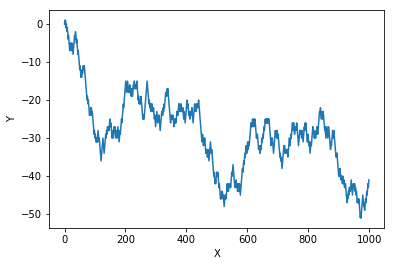

In [81]:
w = RandomWalk()
w.walk(1000)
w.plot()

In [78]:
# バーンスレイのシダ
class BarnsleyFern:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.xlist = [self.x]
        self.ylist = [self.y]
        
    def nextStep(self):
        def step1():
            nextx = 0.85 * self.x + 0.04 * self.y
            nexty = - 0.04 * self.x + 0.85 * self.y + 1.6
            return nextx, nexty
        def step2():
            nextx = 0.2 * self.x - 0.26 * self.y
            nexty = 0.23 * self.x + 0.22 * self.y + 1.6
            return nextx, nexty
        def step3():
            nextx = - 0.15 * self.x + 0.28 * self.y
            nexty = 0.26 * self.x + 0.24 * self.y + 0.44
            return nextx, nexty
        def step4():
            nextx = 0
            nexty = 0.16 * self.y
            return nextx, nexty
               
        stepFunc = self.random_choice([step1, step2, step3, step4], [0.85, 0.07, 0.07, 0.01])
        self.x, self.y = stepFunc()
        self.xlist.append(self.x)
        self.ylist.append(self.y)
        
    # 選択肢のリストと確率のリストを入力として、指定された確率で各選択肢からランダムに選択する
    # 例: ['a', 'b', 'c'], [10, 30, 60] を入力すると10%で'a', 30%で'b', 60%で'c'が返される
    def random_choice(self, options, probabilities):
        probabilities = list(map(lambda e: e / sum(probabilities), probabilities)) # 確率のリストを正規化しつつ昇順ソート
        rand = random.random()
        sump = 0
        for o, p in zip(options, probabilities):
            sump = sump + p
            if rand <= sump:
                return o
        return options[-1] 
        
    def walk(self, num):
        for i in range(1, num):
            self.nextStep()
    
    def plot(self):
        plt.plot(self.xlist, self.ylist, 'o')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Fern with {0} points'.format(len(self.xlist)))
        plt.show()

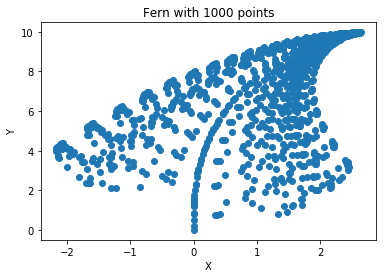

In [79]:
b = BarnsleyFern()
b.walk(1000)
b.plot()